##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

##Install Data profiling

In [ ]:
#!pip install ydata-profiling


##Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Lending_Data/lending_club_loan_two.csv')

##Data Profiling & Summary

In [ ]:
# data profiling - Run only once for the first time
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="Data Profiling Report", explorative=True)

#profile.to_file("output.html")

In [ ]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


##Data Cleaning

In [ ]:
df.shape

(396030, 27)

###Removing Missing Values

In [ ]:
#Remove missing values from features emp_length,mort_acc, pub_rec_bankruptcies
df.dropna(subset=['emp_length', 'mort_acc', 'pub_rec_bankruptcies'], inplace=True)
df.shape

(340990, 27)

###Removing Zeroes

In [ ]:
#Remove zeroes from features such as annual_inc, revol_bal, revol_util
df = df[df['annual_inc'] != 0]
df = df[df['revol_bal'] != 0]
df = df[df['revol_util'] != 0]
df.shape

(339541, 27)

In [ ]:
#Remove none and other values from the rows of home_ownership
df = df[df['home_ownership'] != 'NONE']
df = df[df['home_ownership'] != 'OTHER']
df.shape

(339482, 27)

###Plot Outliers

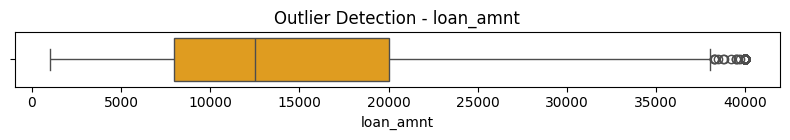

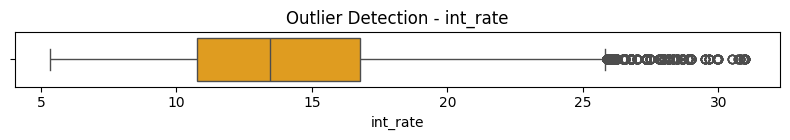

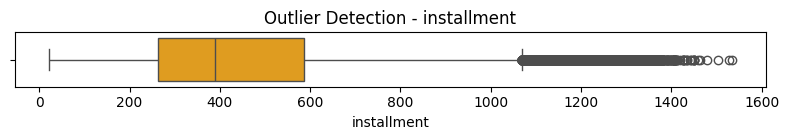

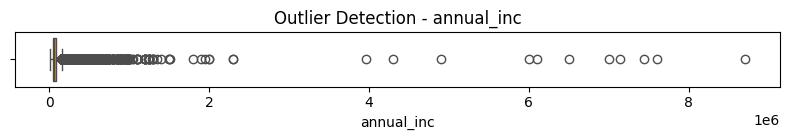

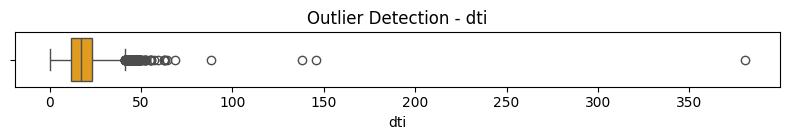

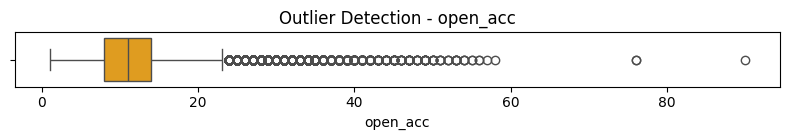

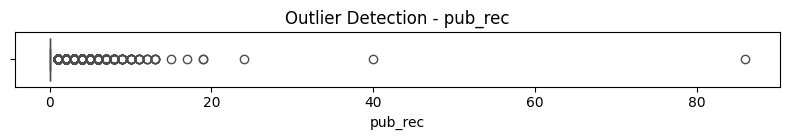

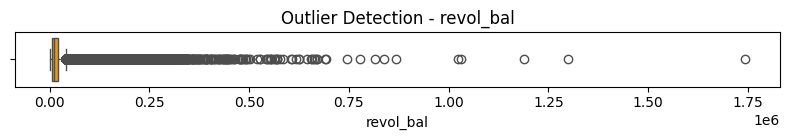

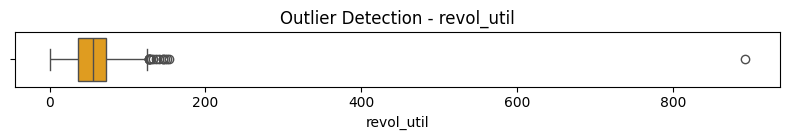

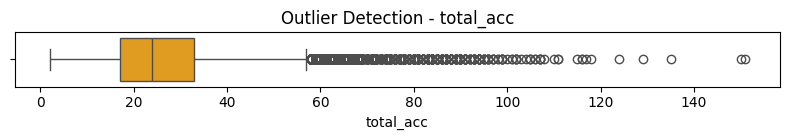

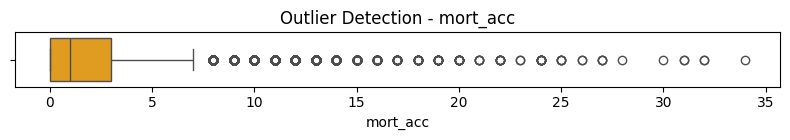

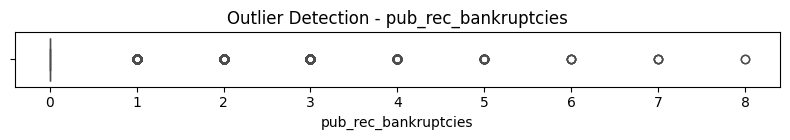

In [ ]:
#Plot outliers
# Select numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Outlier Detection - {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

###Removing Outliers

In [ ]:
#Remove outliers from features loan_amnt, int_rate, open_acc, revol_util
# List of target columns to remove outliers from
cols_to_clean = ['loan_amnt', 'int_rate', 'open_acc', 'revol_util']

# Loop through each column and remove outliers using IQR method
for col in cols_to_clean:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] < upper_bound)]

print(f"Outliers removed. New shape of DataFrame: {df.shape}")

Outliers removed. New shape of DataFrame: (325008, 27)


In [ ]:
#Remove outliers and change upper limit of :
# Remove rows where annual_inc > 20 lakhs
if 'annual_inc' in df.columns:
    df = df[df['annual_inc'] <= 2_000_000]
#Remove rows from total_acc > 110
if 'total_acc' in df.columns:
    df = df[df['total_acc'] <= 110]
#Remove rows from revol_bal > 7.5 lakhs
if 'revol_bal' in df.columns:
    df = df[df['revol_bal'] <= 7_500_000]
#Remove rows from mort_acc >15
if 'mort_acc' in df.columns:
    df = df[df['mort_acc'] <= 15]
    #Remove rows from pub_rec >15
if 'pub_rec' in df.columns:
    df = df[df['pub_rec'] <= 15]
    #Remove rows from pub_rec_bankruptcies >15
if 'pub_rec_bankruptcies' in df.columns:
    df = df[df['pub_rec_bankruptcies'] <= 15]
#Remove rows from dti >70
if 'dti' in df.columns:
    df = df[df['dti'] <= 70]
    #Remove rows from installment > 1450
if 'installment' in df.columns:
    df = df[df['installment'] <= 1450]

In [ ]:
print(f"Outliers removed. New shape of DataFrame: {df.shape}")

Outliers removed. New shape of DataFrame: (324859, 27)


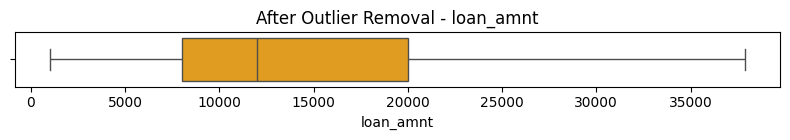

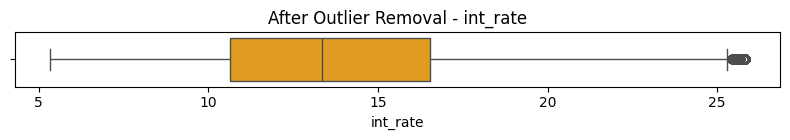

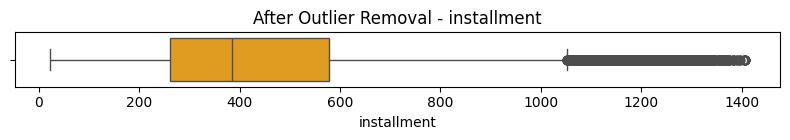

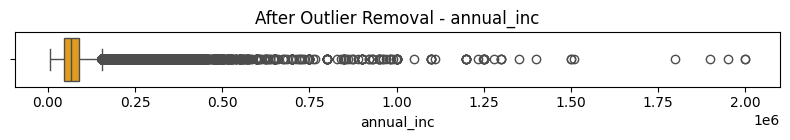

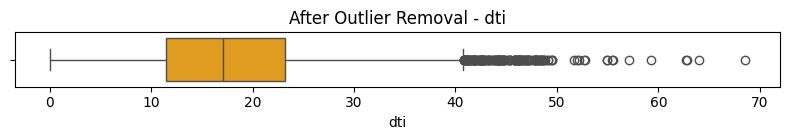

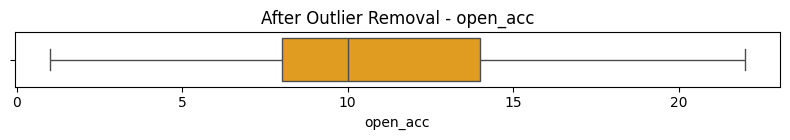

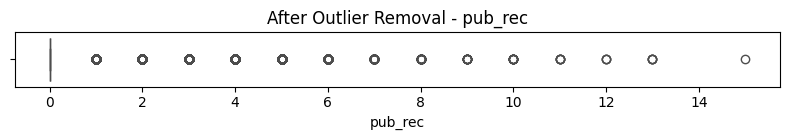

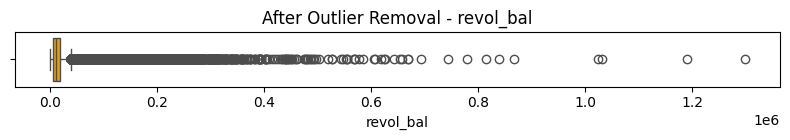

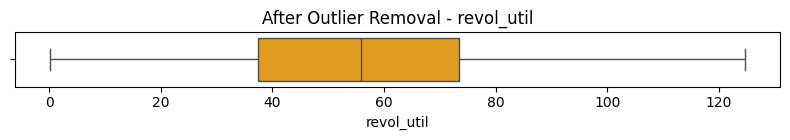

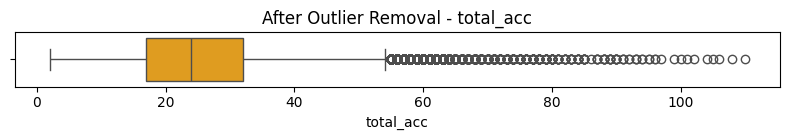

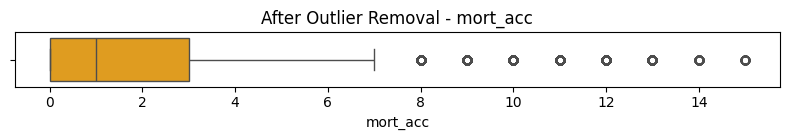

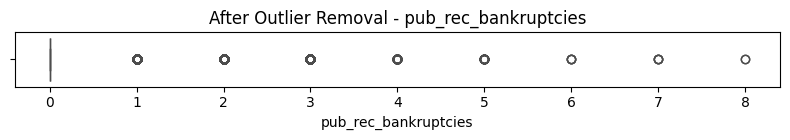

In [ ]:
# Plot boxplots for each numeric column after outlier removal
for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"After Outlier Removal - {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324859 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             324859 non-null  float64
 1   term                  324859 non-null  object 
 2   int_rate              324859 non-null  float64
 3   installment           324859 non-null  float64
 4   grade                 324859 non-null  object 
 5   sub_grade             324859 non-null  object 
 6   emp_title             321562 non-null  object 
 7   emp_length            324859 non-null  object 
 8   home_ownership        324859 non-null  object 
 9   annual_inc            324859 non-null  float64
 10  verification_status   324859 non-null  object 
 11  issue_d               324859 non-null  object 
 12  loan_status           324859 non-null  object 
 13  purpose               324859 non-null  object 
 14  title                 323457 non-null  object 
 15  dti  

#Feature Engineering

In [ ]:
#Feature Engineering for address column - extract zipcode from address
# Extract 2-letter state code and 5-digit pincode from address
df['zip_code'] = df['address'].str.extract(r'([A-Z]{2}\s*\d{5})$')

##Extract necessary data
Conversion to date time format

In [ ]:
from datetime import datetime

In [ ]:
# Step 1: Convert to datetime (if not already)
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Step 2: Strip the time (keep only date)
df['issue_d'] = df['issue_d'].dt.date
df['earliest_cr_line'] = df['earliest_cr_line'].dt.date


/tmp/ipython-input-577587950.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
/tmp/ipython-input-577587950.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


In [ ]:
df['issue_d_year'] = df['issue_d'].apply(lambda x: int(x.strftime('%Y')) if pd.notnull(x) else None)
df['issue_d_month'] = df['issue_d'].apply(lambda x: int(x.strftime('%m')) if pd.notnull(x) else None)
df['issue_d_day'] = df['issue_d'].apply(lambda x: int(x.strftime('%d')) if pd.notnull(x) else None)

df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: int(x.strftime('%Y')) if pd.notnull(x) else None)
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: int(x.strftime('%m')) if pd.notnull(x) else None)
df['earliest_cr_line_day'] = df['earliest_cr_line'].apply(lambda x: int(x.strftime('%d')) if pd.notnull(x) else None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324859 entries, 0 to 396028
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               324859 non-null  float64
 1   term                    324859 non-null  object 
 2   int_rate                324859 non-null  float64
 3   installment             324859 non-null  float64
 4   grade                   324859 non-null  object 
 5   sub_grade               324859 non-null  object 
 6   emp_title               321562 non-null  object 
 7   emp_length              324859 non-null  object 
 8   home_ownership          324859 non-null  object 
 9   annual_inc              324859 non-null  float64
 10  verification_status     324859 non-null  object 
 11  issue_d                 324859 non-null  object 
 12  loan_status             324859 non-null  object 
 13  purpose                 324859 non-null  object 
 14  title                   3

In [ ]:
df.drop(columns = ['issue_d','earliest_cr_line','emp_title','address','application_type'], inplace=True)

In [ ]:
df.shape

(324859, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324859 entries, 0 to 396028
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               324859 non-null  float64
 1   term                    324859 non-null  object 
 2   int_rate                324859 non-null  float64
 3   installment             324859 non-null  float64
 4   grade                   324859 non-null  object 
 5   sub_grade               324859 non-null  object 
 6   emp_length              324859 non-null  object 
 7   home_ownership          324859 non-null  object 
 8   annual_inc              324859 non-null  float64
 9   verification_status     324859 non-null  object 
 10  loan_status             324859 non-null  object 
 11  purpose                 324859 non-null  object 
 12  title                   323457 non-null  object 
 13  dti                     324859 non-null  float64
 14  open_acc                3

In [ ]:
df['statecode'] = df['zip_code'].str.extract(r'^([A-Z]{2})')
df['zip']=df['zip_code'].str.extract(r'(\d{5})$')

In [ ]:
df.drop(columns = ['zip_code'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324859 entries, 0 to 396028
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               324859 non-null  float64
 1   term                    324859 non-null  object 
 2   int_rate                324859 non-null  float64
 3   installment             324859 non-null  float64
 4   grade                   324859 non-null  object 
 5   sub_grade               324859 non-null  object 
 6   emp_length              324859 non-null  object 
 7   home_ownership          324859 non-null  object 
 8   annual_inc              324859 non-null  float64
 9   verification_status     324859 non-null  object 
 10  loan_status             324859 non-null  object 
 11  purpose                 324859 non-null  object 
 12  title                   323457 non-null  object 
 13  dti                     324859 non-null  float64
 14  open_acc                3

In [ ]:
df['zip'] = df['zip'].astype(int)

In [ ]:
sorted_unique_values = sorted(df['emp_length'].unique())
sorted_unique_values

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
#rename <1 year to 0-1 year, 10+ years to 10 years+
df['emp_length'] = df['emp_length'].replace(['< 1 year'], '0-1 year')
df['emp_length'] = df['emp_length'].replace(['10+ years'], '9 years+')

In [ ]:
sorted_unique_values1 = sorted(df['emp_length'].unique())
sorted_unique_values1

['0-1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '9 years+']

In [ ]:
#save the dataset now
df.to_csv('loan_data_cleaned.csv', index=False)

In [ ]:
#drop statecode, title columns
#purpose and title are almost similar classes
df.drop(columns = ['statecode','title','sub_grade','dti','pub_rec'], inplace=True)

In [ ]:
df.shape

(324859, 25)

##One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the columns you want to encode
cols_to_encode = ['home_ownership', 'purpose']

# Initialize the encoder
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Fit and transform
encoded = ohe.fit_transform(df[cols_to_encode])

# Convert to DataFrame and preserve index
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols_to_encode), index=df.index)

# Concatenate back with original dataframe (drop the encoded columns first)
df_encoded = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)

In [ ]:
df_encoded.shape

(324859, 40)

##Label Encoding

In [ ]:
#Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['term'] = le.fit_transform(df_encoded['term'])
df_encoded['emp_length'] = le.fit_transform(df_encoded['emp_length'])
df_encoded['loan_status'] = le.fit_transform(df_encoded['loan_status'])
df_encoded['grade'] = le.fit_transform(df_encoded['grade'])
df_encoded['verification_status'] = le.fit_transform(df_encoded['verification_status'])
df_encoded['initial_list_status'] = le.fit_transform(df_encoded['initial_list_status'])

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324859 entries, 0 to 396028
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   324859 non-null  float64
 1   term                        324859 non-null  int64  
 2   int_rate                    324859 non-null  float64
 3   installment                 324859 non-null  float64
 4   grade                       324859 non-null  int64  
 5   emp_length                  324859 non-null  int64  
 6   annual_inc                  324859 non-null  float64
 7   verification_status         324859 non-null  int64  
 8   loan_status                 324859 non-null  int64  
 9   open_acc                    324859 non-null  float64
 10  revol_bal                   324859 non-null  float64
 11  revol_util                  324859 non-null  float64
 12  total_acc                   324859 non-null  float64
 13  initial_list_status

<Axes: >

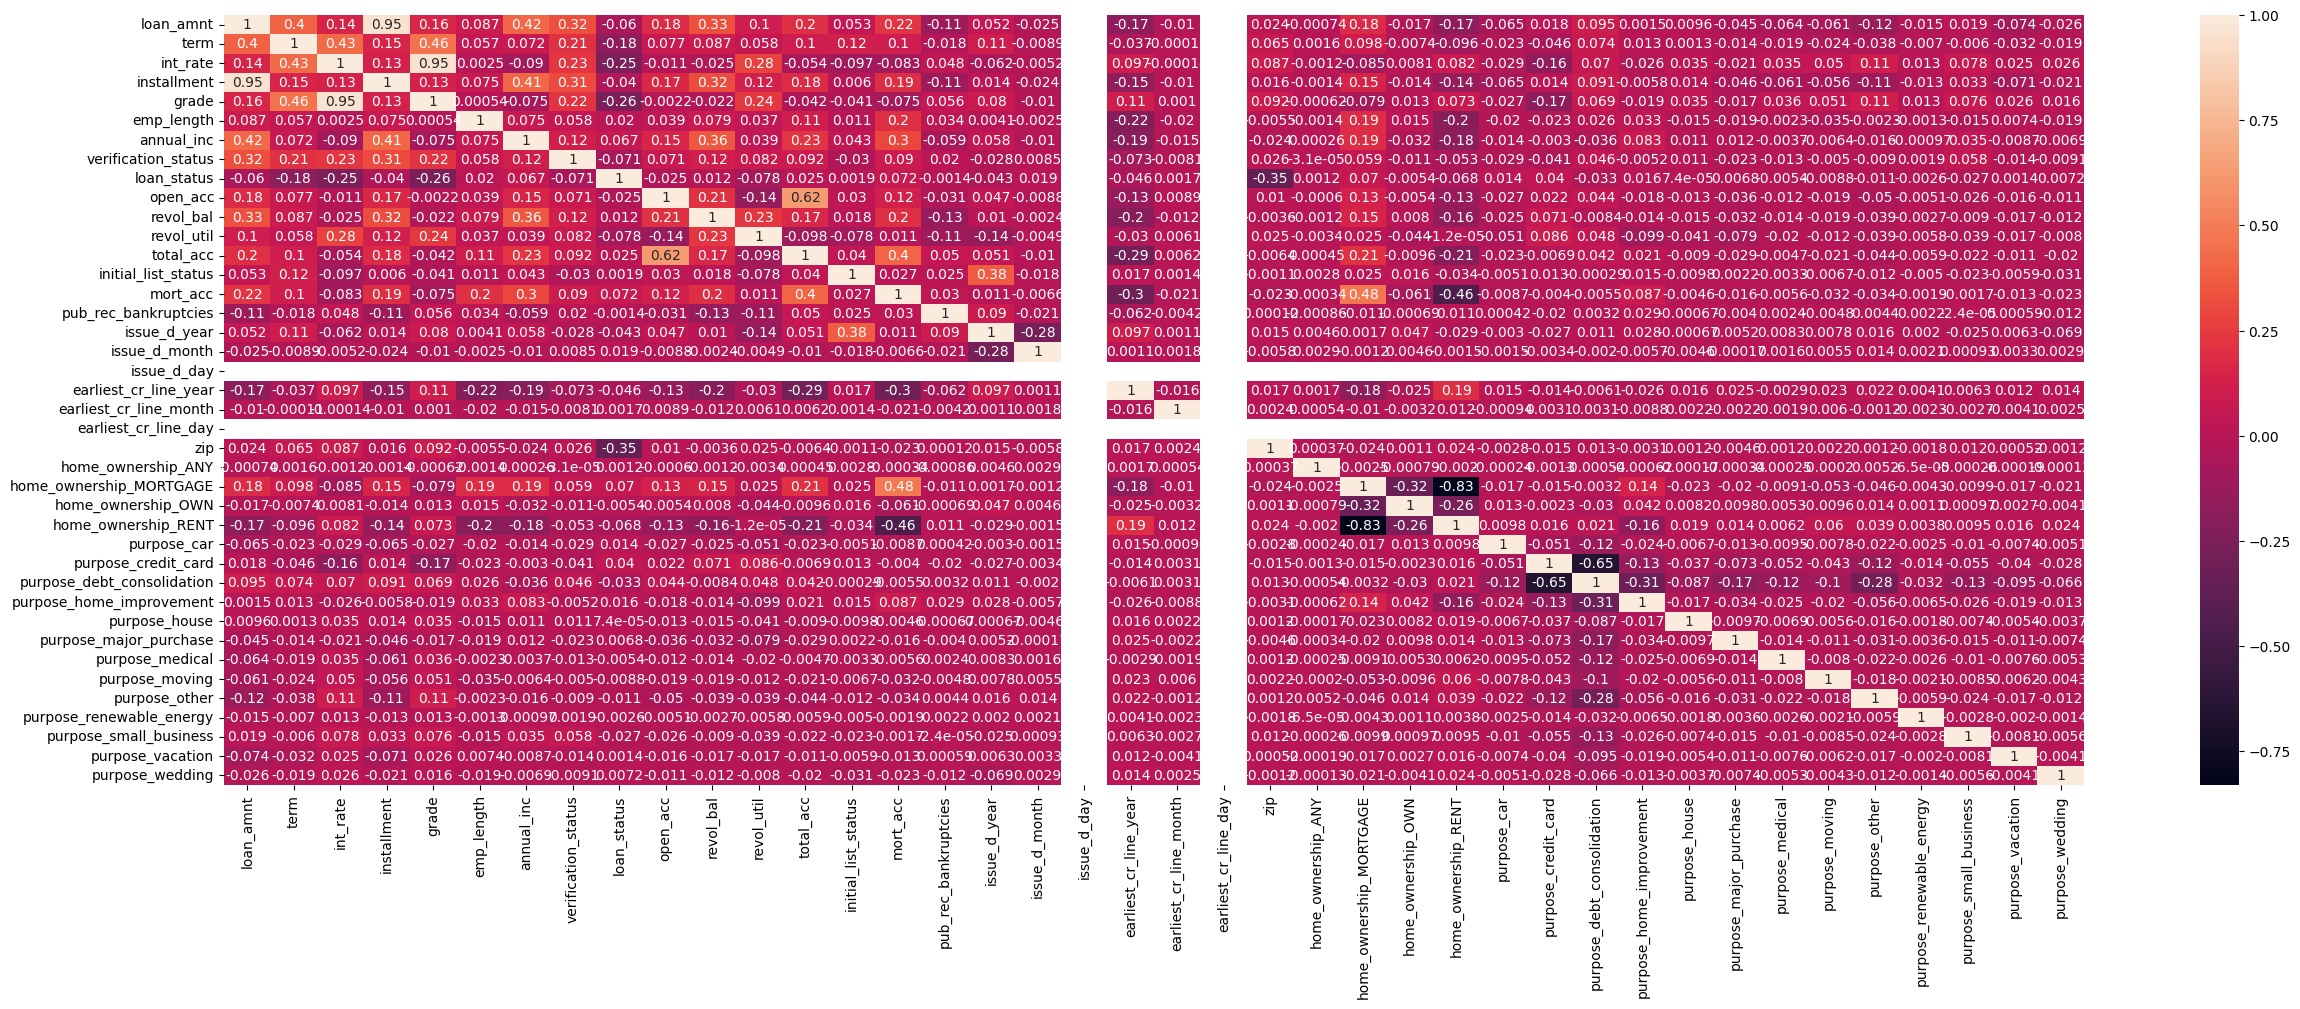

In [ ]:
#Correlation
corr1 = df_encoded.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr1, annot=True)

#ML Modelling

In [ ]:
#X and Y value

# Define the target variable (dependent variable)
y = df_encoded['loan_status']


# Define the feature set (independent variables)
X = df_encoded.drop('loan_status', axis=1)

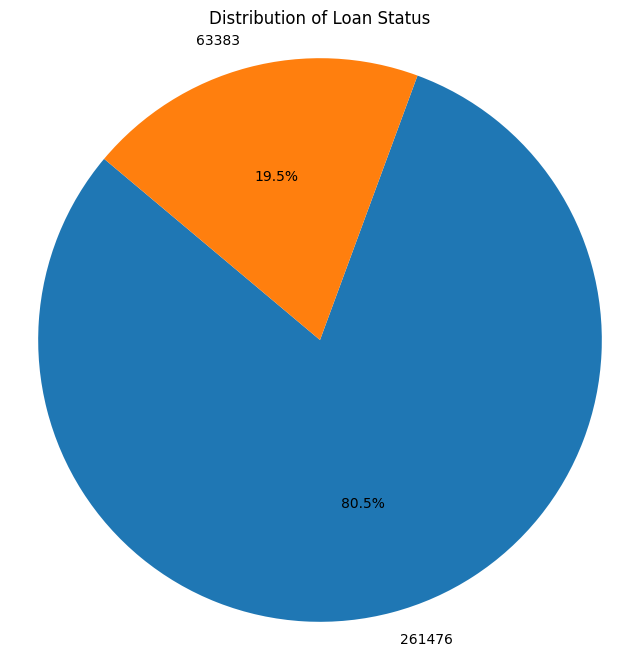

In [ ]:
#Pie chart for loan_status before SMOTE
loan_status_counts = df_encoded['loan_status'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
labels = loan_status_counts
plt.pie(loan_status_counts, labels=loan_status_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

##SMOTE to handle imbalance data

In [ ]:
#SMOTE to handle imbalance data in loan status feature
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
# Drop columns before undersampling
X = X.drop(['earliest_cr_line_day','issue_d_day'], axis=1)
X_res, y_res = undersampler.fit_resample(X, y)

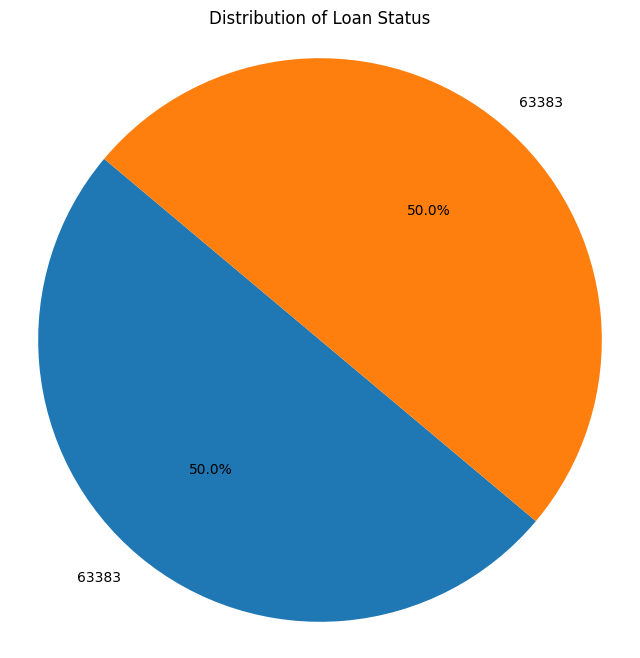

In [ ]:
#Pie chart for loan_status after SMOTE
loan_status_counts1 = y_res.value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts1, labels=loan_status_counts1, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

In [ ]:
X_res.shape

(126766, 37)

##Machine Learning Algorithms

In [ ]:
#Test Train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

###Logistic Regression

In [ ]:
#Logistic Classifier model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.6684152401987852


In [ ]:
#hyperparameter tuning for logistic regression
..from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train_cv)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

SyntaxError: invalid syntax (ipython-input-3370312101.py, line 2)

C=10, penalty='l1', solver='liblinear'

In [ ]:
best_model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
best_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_lr_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print(confusion_matrix(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))

Accuracy: 0.7085666955904394
[[8836 3947]
 [3442 9129]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71     12783
           1       0.70      0.73      0.71     12571

    accuracy                           0.71     25354
   macro avg       0.71      0.71      0.71     25354
weighted avg       0.71      0.71      0.71     25354



#### Feature Importance for Logistic Regression

In [ ]:
### 2. Feature Selection using Logistic Regression (L1 penalty) ###
from sklearn.feature_selection import SelectFromModel
import pandas as pd
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42, max_iter=1000)
selector = SelectFromModel(log_reg)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("\nSelected Features from Logistic Regression (L1):")
print(selected_features.tolist())


Selected Features from Logistic Regression (L1):
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'verification_status', 'open_acc', 'revol_util', 'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month', 'zip', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car', 'purpose_credit_card', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']


In [ ]:
#Top features from Logistic Regression (L1) to new df
# Include 'loan_status' in the selection
# Sort the selected_features index and take the top 15
top_lr_features = selected_features.sort_values(ascending=False).tolist()[:15]
new_lr_df = df_encoded[top_lr_features + ['loan_status']]

In [ ]:
#Split to X and y, test and train data and run LR model
y_new_df = new_lr_df['loan_status']
X_new_df = new_lr_df.drop('loan_status', axis=1)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_df, y_new_df, test_size=0.2, random_state=42)

#LR model
lr_new = LogisticRegression()
lr_new.fit(X_new_train, y_new_train)

#predict accuracy
y_pred_lr_new = lr_new.predict(X_new_test)
accuracy = accuracy_score(y_new_test, y_pred_lr_new)
print("Accuracy:", accuracy)
print(classification_report(y_new_test, y_pred_lr_new))

Accuracy: 0.836175583328203
              precision    recall  f1-score   support

           0       0.73      0.27      0.39     12793
           1       0.84      0.98      0.91     52179

    accuracy                           0.84     64972
   macro avg       0.79      0.62      0.65     64972
weighted avg       0.82      0.84      0.80     64972



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


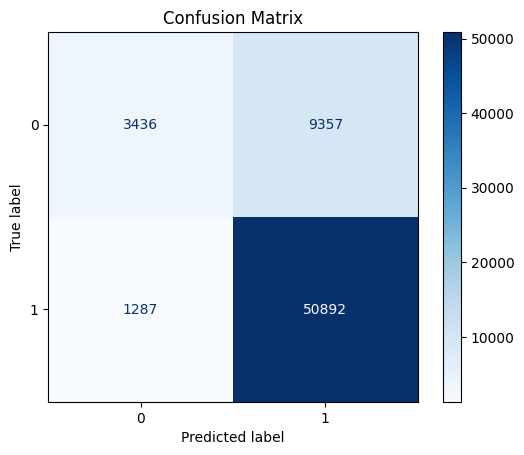

In [ ]:
#Confusion Matrix and AUC-ROC curve code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_new_test, y_pred_lr_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

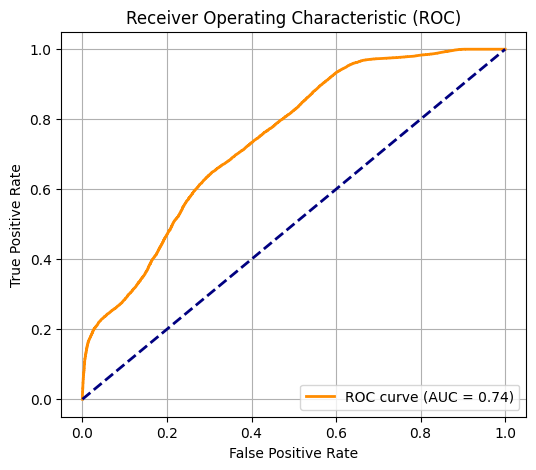

In [ ]:
# 6. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_proba = lr_new.predict_proba(X_new_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_new_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
#save lr model
#import joblib
#joblib.dump(lr_new, 'lr_model.pkl')

###Gradient Boosting Method

In [ ]:
#GBM machine learning model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_gbm = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy)

Accuracy: 0.8063027530172754


In [ ]:
#hyperparameter tuning for GBM model
from sklearn.model_selection import GridSearchCV
param_grid = {
     'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train_cv)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

learning_rate=0.1, max_depth=4, n_estimators=150

In [ ]:
#GBM machine learning model
from sklearn.ensemble import GradientBoostingClassifier
gbm_h = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=150)
gbm_h.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=150)

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_gbm_h = gbm_h.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbm_h)
print("Accuracy:", accuracy)

Accuracy: 0.8082748284294391


In [ ]:
#Classification matrix or F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     12783
           1       0.81      0.79      0.80     12571

    accuracy                           0.81     25354
   macro avg       0.81      0.81      0.81     25354
weighted avg       0.81      0.81      0.81     25354



#### Feature Importance for GBM

In [ ]:
# 1. Feature importance using Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Assuming 'gbm' model is already trained
# gbm = GradientBoostingClassifier()
# gbm.fit(X_train, y_train)


feature_importance_gbm = pd.Series(gbm.feature_importances_, index=X_train.columns)
print("\nTop Features from GBM:")
print(feature_importance_gbm.sort_values(ascending=False).head(15))


Top Features from GBM:
zip                        0.829751
grade                      0.106077
int_rate                   0.015608
term                       0.014113
issue_d_year               0.010837
annual_inc                 0.007725
issue_d_month              0.003024
mort_acc                   0.002483
installment                0.001929
revol_util                 0.001684
home_ownership_RENT        0.001611
loan_amnt                  0.001484
open_acc                   0.001239
home_ownership_MORTGAGE    0.001130
verification_status        0.000569
dtype: float64


In [ ]:
#Top features from GBM to new df
# Include 'loan_status' in the selection
new_df = df_encoded[feature_importance_gbm.sort_values(ascending=False).head(15).index.tolist() + ['loan_status']]

In [ ]:
new_df.head()

,zip,grade,int_rate,term,issue_d_year,annual_inc,issue_d_month,mort_acc,installment,revol_util,home_ownership_RENT,loan_amnt,open_acc,home_ownership_MORTGAGE,verification_status,loan_status
0,22690,1,11.44,0,2015,117000.0,1,0.0,329.48,41.8,1.0,10000.0,16.0,0.0,0,1
1,5113,1,11.99,0,2015,65000.0,1,3.0,265.68,53.3,0.0,8000.0,17.0,1.0,0,1
2,5113,1,10.49,0,2015,43057.0,1,0.0,506.97,92.2,1.0,15600.0,13.0,0.0,1,1
3,813,0,6.49,0,2014,54000.0,11,0.0,220.65,21.5,1.0,7200.0,6.0,0.0,0,1
4,11650,2,17.27,1,2013,55000.0,4,1.0,609.33,69.8,0.0,24375.0,13.0,1.0,2,0


In [ ]:
#Split to X and y, test and train data and run GBM model
y_new_df = new_df['loan_status']
X_new_df = new_df.drop('loan_status', axis=1)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_df, y_new_df, test_size=0.2, random_state=42)

#GBM model
gbm_new = GradientBoostingClassifier()
gbm_new.fit(X_new_train, y_new_train)

#predict accuracy
y_pred_gbm_new = gbm_new.predict(X_new_test)
accuracy = accuracy_score(y_new_test, y_pred_gbm_new)
print("Accuracy:", accuracy)

Accuracy: 0.8913070245644278


In [ ]:
print(classification_report(y_new_test, y_pred_gbm_new))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63     12793
           1       0.88      1.00      0.94     52179

    accuracy                           0.89     64972
   macro avg       0.92      0.73      0.78     64972
weighted avg       0.90      0.89      0.88     64972



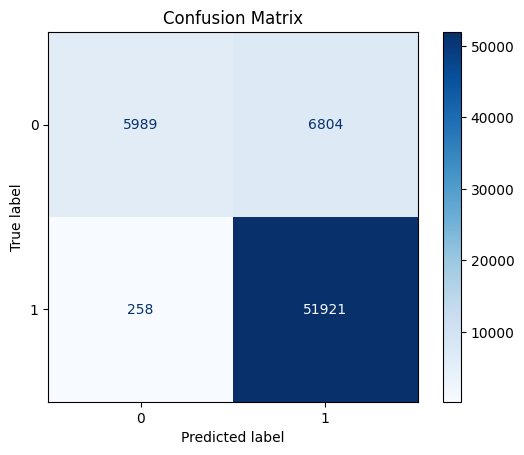

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_new_test, y_pred_gbm_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

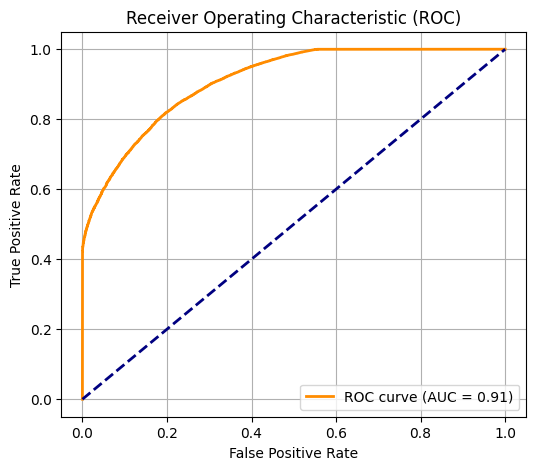

In [ ]:
# 6. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_proba = gbm_new.predict_proba(X_new_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_new_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
#save gbm model
#import joblib
#joblib.dump(gbm_new, 'gbm_model.pkl')

###Random Forest

In [ ]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7964818174646998


In [ ]:
#Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train_cv)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10,
 'n_estimators': 150}

In [ ]:
rf_h = RandomForestClassifier(max_depth=None,
 min_samples_leaf=1,
 min_samples_split=10,
 n_estimators=150)
rf_h.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=150)

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_rf = rf_h.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7966790250059163


#### Feature Importance for Random Forest

In [ ]:
# 1. Feature importance using Random Forest
from sklearn.feature_selection import SelectKBest, f_classif

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features_rf = feature_importances.sort_values(ascending=False)

print("\nTop Features from Random Forest:")
print(important_features_rf.head(10))


Top Features from Random Forest:
zip                      0.307047
int_rate                 0.069580
revol_util               0.053619
annual_inc               0.052212
revol_bal                0.051842
installment              0.049085
grade                    0.046517
total_acc                0.041708
loan_amnt                0.040311
earliest_cr_line_year    0.039036
dtype: float64


In [ ]:
top_rf_features = important_features_rf.sort_values(ascending=False).head(15).index.tolist()
new_rf_df = df_encoded[top_rf_features + ['loan_status']]

In [ ]:
#Split to X and y, test and train data and run RF model
y_new_df = new_rf_df['loan_status']
X_new_df = new_rf_df.drop('loan_status', axis=1)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_df, y_new_df, test_size=0.2, random_state=42)

#LR model
rf_new = RandomForestClassifier()
rf_new.fit(X_new_train, y_new_train)

#predict accuracy
y_pred_rf_new = rf_new.predict(X_new_test)
accuracy = accuracy_score(y_new_test, y_pred_rf_new)
print("Accuracy:", accuracy)
print(classification_report(y_new_test, y_pred_rf_new))

Accuracy: 0.8903989410823124
              precision    recall  f1-score   support

           0       0.94      0.47      0.63     12793
           1       0.88      0.99      0.94     52179

    accuracy                           0.89     64972
   macro avg       0.91      0.73      0.78     64972
weighted avg       0.90      0.89      0.88     64972



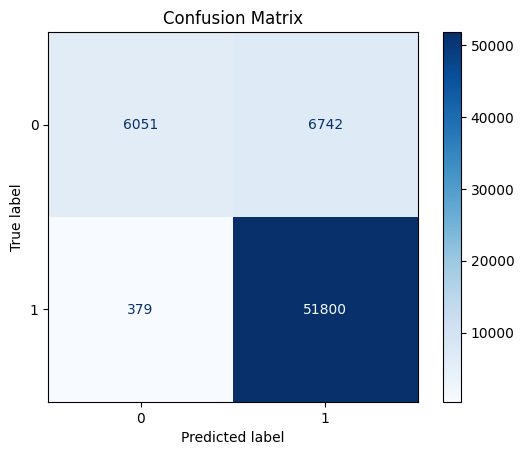

In [ ]:
#Confusion Matrix and AUC-ROC curve code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_new_test, y_pred_rf_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

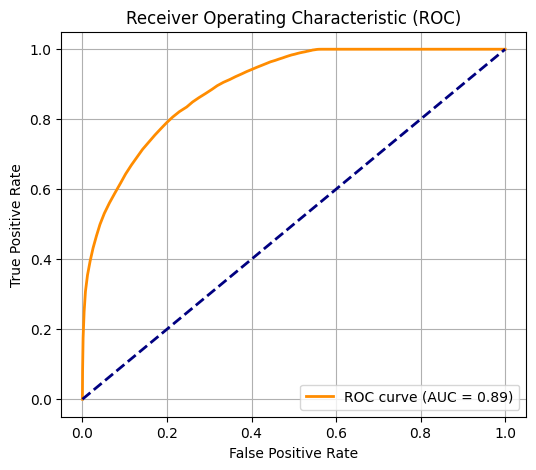

In [ ]:
# 6. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_proba = rf_new.predict_proba(X_new_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_new_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
#save rf model
#import joblib
#joblib.dump(rf, 'rf_model.pkl')

###Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# LinearSVC does NOT support predict_proba directly
base_model = LinearSVC(random_state=42, max_iter=10000)
svm = CalibratedClassifierCV(base_model)

svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000, random_state=42))

In [ ]:
#Predict and find accuracy
from sklearn.metrics import accuracy_score
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.7016644316478662


In [ ]:
#Hyperparameter tuning for SVM
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train_cv)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

#### Feature Importance for SVM

In [ ]:
from sklearn.inspection import permutation_importance

# ✅ Use a smaller sample from X_test if dataset is large
sample_size = 500  # Adjust as needed
X_test_sample = X_test[:sample_size]
y_test_sample = y_test[:sample_size]

result = permutation_importance(
    svm,
    X_test_sample,
    y_test_sample,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# If using NumPy array instead of DataFrame
if isinstance(X_test_sample, pd.DataFrame):
    feature_names = X_test_sample.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_test_sample.shape[1])]

# Organize and sort importances
perm_importance_svm = pd.Series(result.importances_mean, index=feature_names)
perm_importance_svm = perm_importance_svm.sort_values(ascending=False)

# Print top features
print("\nTop Feature Importances from Permutation Importance (SVM):")
print(perm_importance_svm.head(10))



Top Feature Importances from Permutation Importance (SVM):
zip              0.1296
installment      0.0272
int_rate         0.0184
loan_amnt        0.0160
annual_inc       0.0116
open_acc         0.0084
total_acc        0.0080
issue_d_month    0.0064
emp_length       0.0060
mort_acc         0.0056
dtype: float64


In [ ]:
top_svm_features = perm_importance_svm.sort_values(ascending=False).head(15).index.tolist()
new_svm_df = df_encoded[top_svm_features + ['loan_status']]

In [ ]:
#Split to X and y, test and train data and run SVM model
y_new_df = new_svm_df['loan_status']
X_new_df = new_svm_df.drop('loan_status', axis=1)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_df, y_new_df, test_size=0.2, random_state=42)

#SVM model
svm_new = LinearSVC(random_state=42, max_iter=10000)
svm_new.fit(X_new_train, y_new_train)

#predict accuracy
y_pred_svm_new = svm_new.predict(X_new_test)
accuracy = accuracy_score(y_new_test, y_pred_svm_new)
print("Accuracy:", accuracy)
print(classification_report(y_new_test, y_pred_svm_new))

Accuracy: 0.8399156559748815
              precision    recall  f1-score   support

           0       0.93      0.20      0.33     12793
           1       0.84      1.00      0.91     52179

    accuracy                           0.84     64972
   macro avg       0.88      0.60      0.62     64972
weighted avg       0.85      0.84      0.80     64972



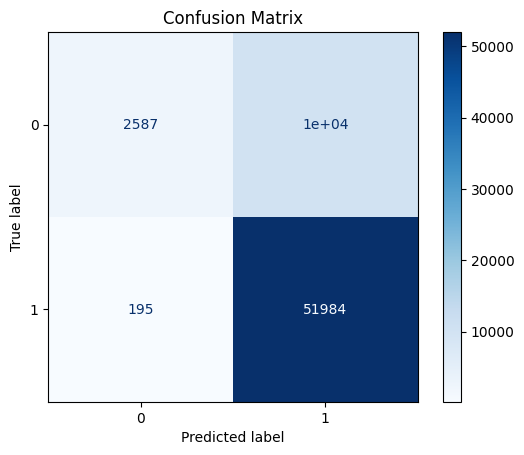

In [ ]:
#Confusion Matrix and AUC-ROC curve code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_new_test, y_pred_svm_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

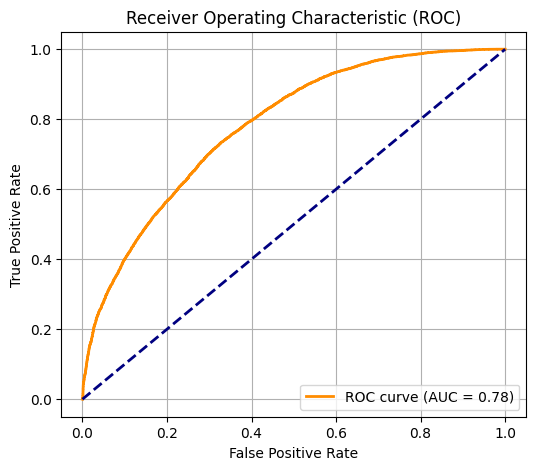

In [ ]:
# 6. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_proba = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
#save svm model
#import joblib
#joblib.dump(svm, 'svm_model.pkl')

#ANN (Deep Learning)

In [ ]:
#Run ANN for the current dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Artificial Neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_new_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#predict ANN accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_new_train, y_new_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_new_test, y_new_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6498/6498 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7302 - loss: 66.3755 - val_accuracy: 0.8278 - val_loss: 8.9592
Epoch 2/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7620 - loss: 13.9426 - val_accuracy: 0.8104 - val_loss: 7.6403
Epoch 3/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7820 - loss: 5.7421 - val_accuracy: 0.8221 - val_loss: 7.3997
Epoch 4/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7950 - loss: 1.8184 - val_accuracy: 0.8843 - val_loss: 0.4140
Epoch 5/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8438 - loss: 0.5632 - val_accuracy: 0.8768 - val_loss: 0.3450
Epoch 6/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8723 - loss: 0.3405 - val_accuracy: 0.8149 - val_loss: 0.4267
Epoch 7/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8240 - loss: 0.4129 - val_accuracy: 0.8076 - val_loss: 0.4417
Epoch 8/20
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8287 - loss: 0.4048 - v

In [ ]:
# 1. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_new_train)
X_test_scaled = scaler.transform(X_new_test)

# 2. Model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_new_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Optional: class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_new_train)
class_weight_dict = dict(enumerate(class_weights))

# 5. Train
model.fit(X_train_scaled, y_new_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

# 6. Evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_new_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7400 - loss: 0.5232 - val_accuracy: 0.7733 - val_loss: 0.4225
Epoch 2/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8042 - loss: 0.3907 - val_accuracy: 0.8208 - val_loss: 0.3663
Epoch 3/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8055 - loss: 0.3888 - val_accuracy: 0.8115 - val_loss: 0.3709
Epoch 4/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8054 - loss: 0.3855 - val_accuracy: 0.8056 - val_loss: 0.3822
Epoch 5/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8098 - loss: 0.3820 - val_accuracy: 0.7939 - val_loss: 0.3835
Epoch 6/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8052 - loss: 0.3820 - val_accuracy: 0.8017 - val_loss: 0.3782
Epoch 7/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8082 - loss: 0.3781 - val_accuracy: 0.8095 - val_loss: 0.3662
Epoch 8/50
6498/6498 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8094 - loss: 0

#Best Model Evaluation

In [ ]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# ------------------- Load Dataset -------------------
df_path = "/content/loan_data_cleaned.csv"
df = pd.read_csv(df_path)

# ------------------- Extract Year from Date Column -------------------
if 'earliest_cr_line' in df.columns:
    df['earliest_cr_line_year'] = pd.to_datetime(
        df['earliest_cr_line'], errors='coerce').dt.year

# ------------------- Define Feature Set -------------------
possible_features = [
    'zip',  # optional
    'earliest_cr_line_year',
    'int_rate', 'revol_bal', 'revol_util',
    'annual_inc', 'installment', 'total_acc',
    'loan_amnt', 'open_acc'
]

# Use only existing features
features = [col for col in possible_features if col in df.columns]
missing = [col for col in possible_features if col not in df.columns]

print(f"✅ Using features: {features}")
if missing:
    print(f"⚠️ Skipping missing columns: {missing}")

# ------------------- Target Processing -------------------
target = 'loan_status'
if df[target].dtype == 'object':
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])

# ------------------- Feature / Target Split -------------------
X = df[features]
y = df[target]

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Define Pipeline -------------------
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # Optional but good for many ML models
    ('model', GradientBoostingClassifier())
])

# ------------------- Train Model -------------------
pipeline.fit(X_train, y_train)

# ------------------- Evaluate Model -------------------
y_pred = pipeline.predict(X_test)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# ------------------- Save Pipeline & Features -------------------
os.makedirs("models", exist_ok=True)
joblib.dump(pipeline, "models/gbm_pipeline.pkl")
joblib.dump(features, "models/model_columns.pkl")
print("\n💾 Pipeline saved as 'models/gbm_pipeline.pkl'")
print("💾 Feature columns saved as 'models/model_columns.pkl'")

✅ Using features: ['zip', 'earliest_cr_line_year', 'int_rate', 'revol_bal', 'revol_util', 'annual_inc', 'installment', 'total_acc', 'loan_amnt', 'open_acc']

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.45      0.62     12793
           1       0.88      1.00      0.94     52179

    accuracy                           0.89     64972
   macro avg       0.94      0.72      0.78     64972
weighted avg       0.90      0.89      0.87     64972

✅ Accuracy: 89.04%

💾 Pipeline saved as 'models/gbm_pipeline.pkl'
💾 Feature columns saved as 'models/model_columns.pkl'
